In [1]:
import numpy as np
import pandas as pd
import psix

In [2]:
# I had already ran a PCA of the normalized gene expression and filtered out some non-neuron cells. Here I am getting
# this data to get a list of only neurons:

neuron_cells = pd.read_csv('/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/midbrain_development/data/pc3_rd.tab.gz', 
                     sep='\t', index_col=0).index

In [3]:
# Create an empty Psix object
psix_object = psix.Psix()

# Process STARsolo output into PSI and mRNA counts:
# sj_dir: Directory with raw STARsolo SJ output
# intron_file: Annotation, proivided in Psix github
# tpm_file: gene x cells matrix of gene expression in TPM
# cell_list: list of cells to keep. In this case, we only use neuron cells
# save_files_in: will save psi and mrna tables in the specified location
# solo = True: indicates that sj_dir has the output of STARsolo

psix_object.junctions2psi(
        sj_dir = '/mnt/lareaulab/cfbuenabadn/RNASeq/Mouse/Tiklova/STARsolo/star_output_NoDedup/Solo.out/SJ/raw',
        intron_file = '/mnt/lareaulab/cfbuenabadn/Genomes/pipeline_files/mm10_introns.tab',
        tpm_file = '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/midbrain_development/data/tpm.tab.gz',
        cell_list = neuron_cells,
        save_files_in='psix_solo_object/',
        solo = True
    )

Processing STARsolo output. This might take a few minutes...
Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:51<00:00, 20.57it/s]


Successfully processed RNA-seq data


In [4]:
# Running Psix on the pre-processed object

# latent: a low dimensional representation of the cell-state (in this case, a PCA of normalized expression)
# n_jobs: how many threads to use. Psix is slow, but using many threads speeds it up.

psix_object.run_psix(latent='~/psix_project/analysis_psix/midbrain_development/data/pc3_rd.tab.gz', n_jobs=25)

Computing cell-cell metric...


100%|██████████| 1067/1067 [00:00<00:00, 3511.44it/s]

Successfully computed cell-cell metric
Computing Psix score in 1813 exons



100%|██████████| 1813/1813 [00:20<00:00, 87.95it/s] 


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:46<00:00, 21.05s/it]  


Successfully estimated p-values


In [5]:
# Exon scores and p-values
psix_object.psix_results.head()

,psix_score,pvals,qvals
Mapt_1,2.401743,0.0005,0.00188
Ndrg4_1,2.274562,0.0005,0.00188
Mapt_3,2.194445,0.0005,0.00188
Cadm1_10,1.573812,0.0005,0.00188
Gabrg2_1,1.566668,0.0005,0.00188


Successfully computed neighbors


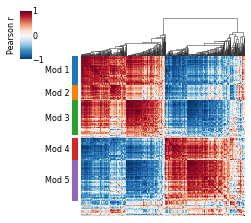

In [6]:
# Computing modules and plotting matrix of correlations

# plot = True: plots the following matrix
# plot_name: saves the plot on the specified location
psix_object.compute_modules(plot = True, plot_name = 'exon_modules_solo.png')

In [7]:
# You can access the modules assigned for each exon here:
psix_object.modules

Kif1a_5            1
Nrcam_3            1
Fnbp1l_3           1
Fnbp1l_4           1
Mff_5              1
                  ..
Vps8_9            -1
Mettl16_nmdSE_1   -1
Brd3_3            -1
March8_9          -1
Cinp_1            -1
Name: Modules, Length: 617, dtype: int64

In [6]:
# save psix object on specified location
psix_object.save_psix_object(psix_dir = 'psix_solo_object/')

In [9]:
# Next time you want to check your results, you can skip all the previous steps:
psix_object = psix.Psix(psix_object = 'psix_solo_object/')